# ANALYSIS OF BENCHMARK NEUROBLASTOMA

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch 


# 1. Data

In [124]:
data = [
    # GNN
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.91068, "Gene mAP": 0.87902, "Cell mAP": 0.88392},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.92448, "Gene mAP": 0.91121, "Cell mAP": 0.88933},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.92007, "Gene mAP": 0.90378, "Cell mAP": 0.89651},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.90651, "Gene mAP": 0.88788, "Cell mAP": 0.87394},
    {"Model": "GNN", "Gene feature": "C4", "Cell feature": "CNV", "Test AP": 0.89279, "Gene mAP": 0.87496, "Cell mAP": 0.88345},
    {"Model": "GNN", "Gene feature": "C4", "Cell feature": "MOSA", "Test AP": 0.90509, "Gene mAP": 0.91569, "Cell mAP": 0.87720},
    {"Model": "GNN", "Gene feature": "C4", "Cell feature": "expression", "Test AP": 0.89910, "Gene mAP": 0.89161, "Cell mAP": 0.86522},
    {"Model": "GNN", "Gene feature": "C4", "Cell feature": "expression_mg", "Test AP": 0.87946, "Gene mAP": 0.87388, "Cell mAP": 0.85561},

    # GNN-GNN-MPMUT
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.92619, "Gene mAP": 0.89476, "Cell mAP": 0.89838},
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.92240, "Gene mAP": 0.90408, "Cell mAP": 0.89446},
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.92696, "Gene mAP": 0.90872, "Cell mAP": 0.89282},
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.92301, "Gene mAP": 0.88791, "Cell mAP": 0.90231},
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "C4", "Cell feature": "CNV", "Test AP": 0.91085, "Gene mAP": 0.88265, "Cell mAP": 0.89262},
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "C4", "Cell feature": "MOSA", "Test AP": 0.92277, "Gene mAP": 0.91989, "Cell mAP": 0.89646},
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "C4", "Cell feature": "expression", "Test AP": 0.92149, "Gene mAP": 0.90355, "Cell mAP": 0.89362},
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "C4", "Cell feature": "expression_mg", "Test AP": 0.91757, "Gene mAP": 0.89143, "Cell mAP": 0.89075},

    # GNN-GNN-MPDEP
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.91862, "Gene mAP": 0.88424, "Cell mAP": 0.89343},
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.92400, "Gene mAP": 0.89995, "Cell mAP": 0.89552},
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.91321, "Gene mAP": 0.90891, "Cell mAP": 0.89262},
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.91396, "Gene mAP": 0.90667, "Cell mAP": 0.88403},
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "C4", "Cell feature": "CNV", "Test AP": 0.91652, "Gene mAP": 0.87734, "Cell mAP": 0.89837},
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "C4", "Cell feature": "expression", "Test AP": 0.92029, "Gene mAP": 0.90026, "Cell mAP": 0.89130},
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "C4", "Cell feature": "expression_mg", "Test AP": 0.92607, "Gene mAP": 0.90465, "Cell mAP": 0.90181},
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "C4", "Cell feature": "MOSA", "Test AP": 0.89069, "Gene mAP": 0.90890, "Cell mAP": 0.86577},

    # MLP-GNN
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.91851, "Gene mAP": 0.88276, "Cell mAP": 0.90120},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.92295, "Gene mAP": 0.90832, "Cell mAP": 0.89968},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.91671, "Gene mAP": 0.89455, "Cell mAP": 0.88716},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.92453, "Gene mAP": 0.90737, "Cell mAP": 0.89571},
    {"Model": "MLP-GNN", "Gene feature": "C4", "Cell feature": "CNV", "Test AP": 0.91468, "Gene mAP": 0.88603, "Cell mAP": 0.89877},    {"Model": "MLP-GNN", "Gene feature": "C4", "Cell feature": "MOSA", "Test AP": 0.90296, "Gene mAP": 0.89985, "Cell mAP": 0.86850},
    {"Model": "MLP-GNN", "Gene feature": "C4", "Cell feature": "expression", "Test AP": 0.91401, "Gene mAP": 0.88986, "Cell mAP": 0.88146},
    {"Model": "MLP-GNN", "Gene feature": "C4", "Cell feature": "expression_mg", "Test AP": 0.92307, "Gene mAP": 0.89476, "Cell mAP": 0.89763},

    # MLP
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.92941, "Gene mAP": 0.90075, "Cell mAP": 0.91008},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.93020, "Gene mAP": 0.92616, "Cell mAP": 0.90438},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.92418, "Gene mAP": 0.92141, "Cell mAP": 0.89483},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.92503, "Gene mAP": 0.92025, "Cell mAP": 0.89712},
    {"Model": "MLP", "Gene feature": "C4", "Cell feature": "CNV", "Test AP": 0.89166, "Gene mAP": 0.88742, "Cell mAP": 0.87280},
    {"Model": "MLP", "Gene feature": "C4", "Cell feature": "MOSA", "Test AP": 0.89872, "Gene mAP": 0.91174, "Cell mAP": 0.87288},
    {"Model": "MLP", "Gene feature": "C4", "Cell feature": "expression", "Test AP": 0.90590, "Gene mAP": 0.91286, "Cell mAP": 0.88840},
    {"Model": "MLP", "Gene feature": "C4", "Cell feature": "expression_mg", "Test AP": 0.89336, "Gene mAP": 0.91726, "Cell mAP": 0.86875},
]

df = pd.DataFrame(data)

# 2. Plots

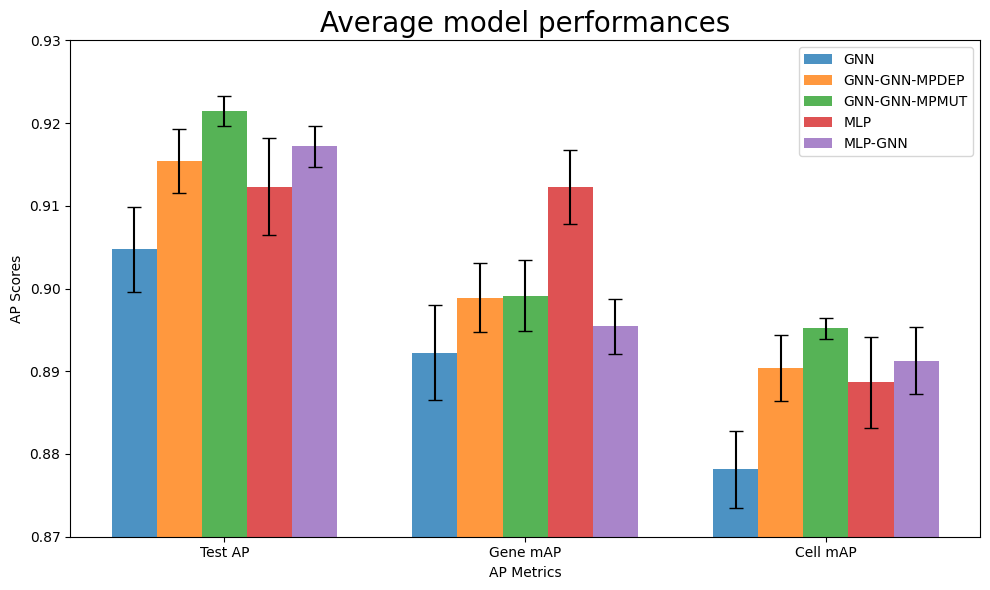

In [125]:
# Calculate mean and standard error for each model
mean_by_model = df.groupby("Model")[["Test AP", "Gene mAP", "Cell mAP"]].mean()
std_by_model = df.groupby("Model")[["Test AP", "Gene mAP", "Cell mAP"]].std()
count_by_model = df.groupby("Model")[["Test AP", "Gene mAP", "Cell mAP"]].count()

# Calculate standard error (std / sqrt(n))
stderr_by_model = std_by_model / np.sqrt(count_by_model)

# Transpose the dataframes to have AP metrics on x-axis and models as bars
mean_by_model_transposed = mean_by_model.T
stderr_by_model_transposed = stderr_by_model.T

# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Get the positions for the bars
x = np.arange(len(mean_by_model_transposed.index))
width = 0.15  # Width of bars
models = mean_by_model_transposed.columns

# Plot bars for each model with error bars
for i, model in enumerate(models):
    ax.bar(x + i * width, mean_by_model_transposed[model], width, 
           yerr=stderr_by_model_transposed[model], 
           label=model, capsize=5, alpha=0.8)

# Set the y-axis limits
ax.set_ylim(bottom=0.87, top=0.93)

# Set labels and title
ax.set_xlabel("AP Metrics")
ax.set_ylabel("AP Scores")
ax.set_title("Average model performances", fontsize=20)
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(mean_by_model_transposed.index)
ax.legend()

# Adjust plot to prevent labels from being cut off
plt.tight_layout()
plt.savefig("./Data/Figures/Neuro/Mean_metrics_per_model.png", dpi=600, bbox_inches='tight')
plt.show()



The GNN model seems to have the lowest metrics for all three of them (test AP, gene AP and cell AP).

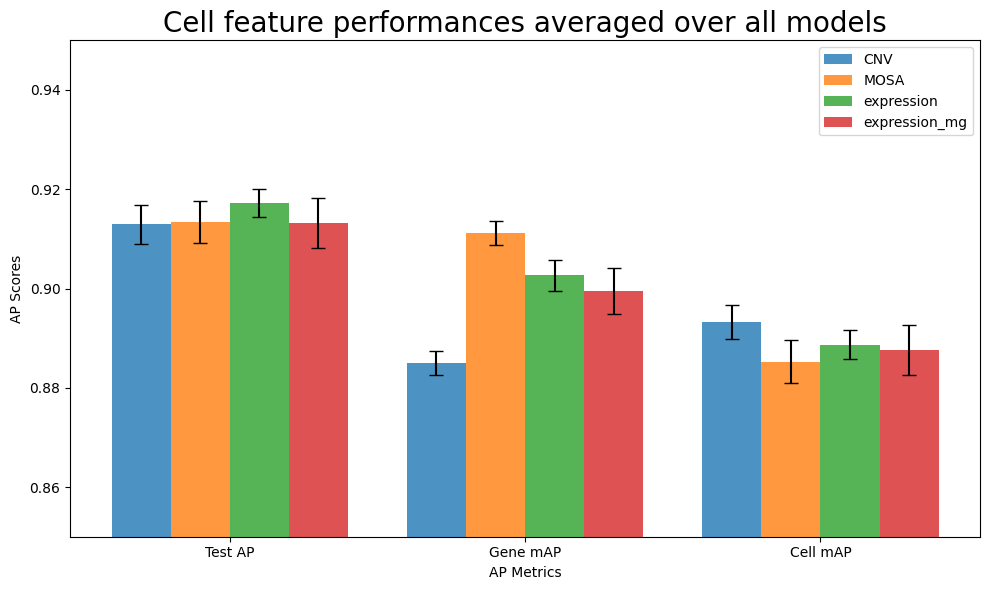

In [126]:
# Calculate mean and standard error for each cell feature
mean_by_model = df.groupby("Cell feature")[["Test AP", "Gene mAP", "Cell mAP"]].mean()
std_by_model = df.groupby("Cell feature")[["Test AP", "Gene mAP", "Cell mAP"]].std()
count_by_model = df.groupby("Cell feature")[["Test AP", "Gene mAP", "Cell mAP"]].count()

# Calculate standard error (std / sqrt(n))
stderr_by_model = std_by_model / np.sqrt(count_by_model)

# Transpose the dataframes to have AP metrics on x-axis and features as bars
mean_by_model_transposed = mean_by_model.T
stderr_by_model_transposed = stderr_by_model.T

# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Get the positions for the bars
x = np.arange(len(mean_by_model_transposed.index))
width = 0.2  # Width of bars
features = mean_by_model_transposed.columns

# Plot bars for each cell feature with error bars
for i, feature in enumerate(features):
    ax.bar(x + i * width, mean_by_model_transposed[feature], width, 
           yerr=stderr_by_model_transposed[feature], 
           label=feature, capsize=5, alpha=0.8)

# Set the y-axis limits
ax.set_ylim(bottom=0.85, top=0.95)

# Set labels and title
ax.set_xlabel("AP Metrics")
ax.set_ylabel("AP Scores")
ax.set_title("Cell feature performances averaged over all models", fontsize=20)
ax.set_xticks(x + width * (len(features) - 1) / 2)
ax.set_xticklabels(mean_by_model_transposed.index)
ax.legend()

# Adjust plot to prevent labels from being cut off
plt.tight_layout()
plt.savefig("./Data/Figures/Neuro/Mean_cell_feature_metrics.png", dpi=600, bbox_inches='tight')
plt.show()




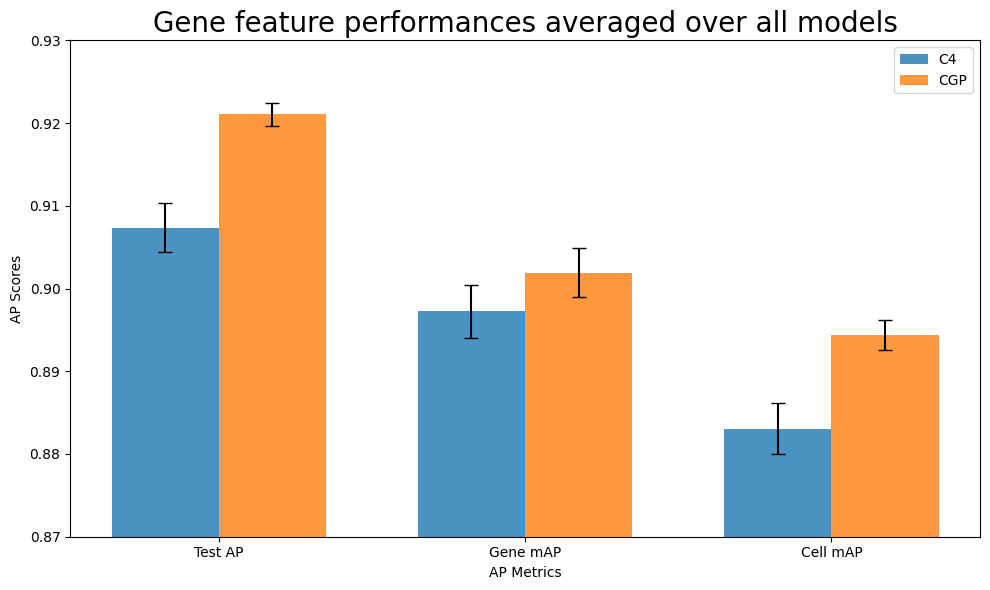

In [127]:
# Calculate mean and standard error for each gene feature
mean_by_model = df.groupby("Gene feature")[["Test AP", "Gene mAP", "Cell mAP"]].mean()
std_by_model = df.groupby("Gene feature")[["Test AP", "Gene mAP", "Cell mAP"]].std()
count_by_model = df.groupby("Gene feature")[["Test AP", "Gene mAP", "Cell mAP"]].count()

# Calculate standard error (std / sqrt(n))
stderr_by_model = std_by_model / np.sqrt(count_by_model)

# Transpose the dataframes to have AP metrics on x-axis and features as bars
mean_by_model_transposed = mean_by_model.T
stderr_by_model_transposed = stderr_by_model.T

# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Get the positions for the bars
x = np.arange(len(mean_by_model_transposed.index))
width = 0.35  # Width of bars (wider since only 2 gene features)
features = mean_by_model_transposed.columns

# Plot bars for each gene feature with error bars
for i, feature in enumerate(features):
    ax.bar(x + i * width, mean_by_model_transposed[feature], width, 
           yerr=stderr_by_model_transposed[feature], 
           label=feature, capsize=5, alpha=0.8)

# Set the y-axis limits
ax.set_ylim(bottom=0.87, top=0.93)

# Set labels and title
ax.set_xlabel("AP Metrics")
ax.set_ylabel("AP Scores")
ax.set_title("Gene feature performances averaged over all models", fontsize=20)
ax.set_xticks(x + width * (len(features) - 1) / 2)
ax.set_xticklabels(mean_by_model_transposed.index)
ax.legend()

# Adjust plot to prevent labels from being cut off
plt.tight_layout()
plt.savefig("./Data/Figures/Neuro/Mean_gene_feature_metrics.png", dpi=600, bbox_inches='tight')
plt.show()



### AP scores by model 

#### scatter plots

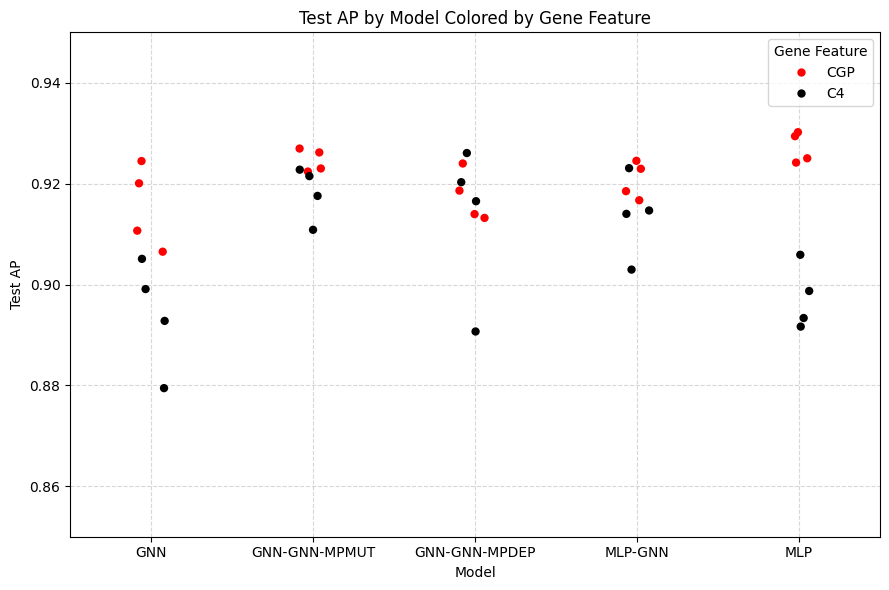

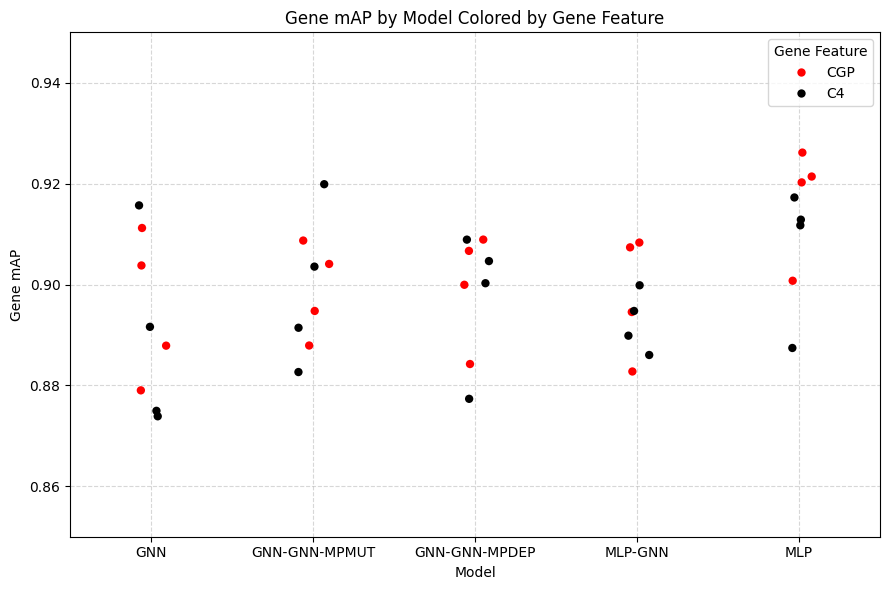

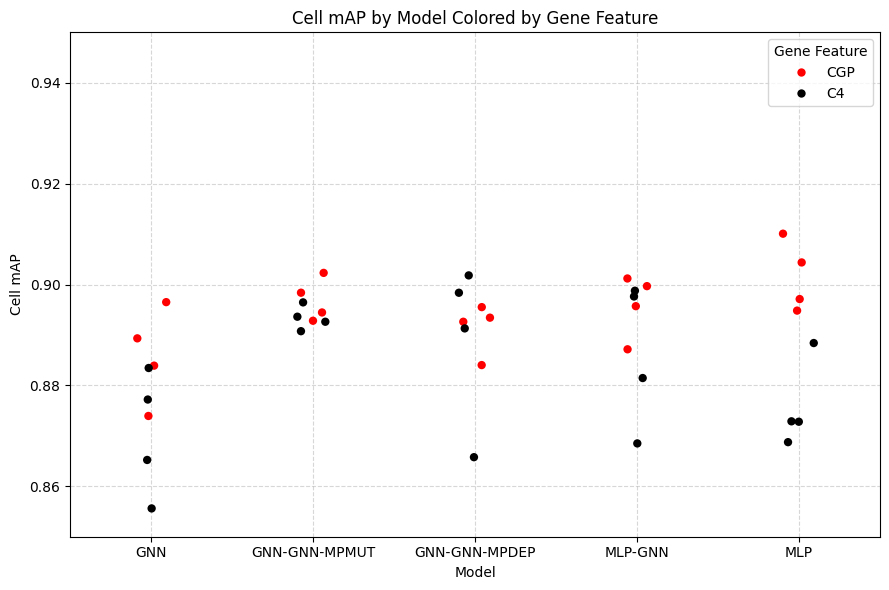

In [128]:

# Map gene features to colors
palette = {"CGP": "red", "C4": "black"}

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()

# Save BEFORE showing
plt.savefig("./Data/Figures/Neuro/Test_AP_by_model_colored_by_gene_feature.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Gene mAP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Gene mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()

# Save BEFORE showing
plt.savefig("./Data/Figures/Neuro/Test_gene_AP_by_model_colored_by_gene_feature.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Cell mAP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Cell mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()

# Save BEFORE showing
plt.savefig("./Data/Figures/Neuro/Test_cell_AP_by_model_colored_by_gene_feature.png", dpi=300, bbox_inches='tight')
plt.show()

# STatitical analysis

In [129]:
# Statistical Analysis for Small Dataset
from scipy import stats
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.libqsturng import psturng
import numpy as np

def check_normality(data, group_col, value_cols):
    """Check normality assumption for each group"""
    print("=== Normality Tests (Shapiro-Wilk) ===")
    for value_col in value_cols:
        print(f"\n{value_col}:")
        for group in data[group_col].unique():
            group_data = data[data[group_col] == group][value_col]
            stat, p_value = stats.shapiro(group_data)
            print(f"  {group}: p={p_value:.4f} {'(Normal)' if p_value > 0.05 else '(Non-normal)'}")

def perform_kruskal_wallis(data, group_col, value_cols):
    """Perform Kruskal-Wallis test (non-parametric ANOVA)"""
    print(f"\n=== Kruskal-Wallis Tests for {group_col} ===")
    results = {}
    
    for value_col in value_cols:
        groups = [data[data[group_col] == group][value_col].values 
                 for group in data[group_col].unique()]
        
        stat, p_value = kruskal(*groups)
        results[value_col] = {'statistic': stat, 'p_value': p_value}
        
        print(f"\n{value_col}:")
        print(f"  H-statistic: {stat:.4f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Result: {'Significant difference' if p_value < 0.05 else 'No significant difference'}")
    
    return results

def dunn_test_pairwise(data, group_col, value_col):
    """Perform pairwise comparisons using Mann-Whitney U (Dunn's test alternative)"""
    groups = data[group_col].unique()
    n_comparisons = len(groups) * (len(groups) - 1) // 2
    bonferroni_alpha = 0.05 / n_comparisons
    
    print(f"\n=== Pairwise Comparisons for {value_col} ===")
    print(f"Bonferroni corrected alpha: {bonferroni_alpha:.4f}")
    
    significant_pairs = []
    for i, group1 in enumerate(groups):
        for group2 in groups[i+1:]:
            data1 = data[data[group_col] == group1][value_col]
            data2 = data[data[group_col] == group2][value_col]
            
            stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
            is_significant = p_value < bonferroni_alpha
            
            if is_significant:
                significant_pairs.append((group1, group2, p_value))
            
            print(f"  {group1} vs {group2}: p={p_value:.4f} {'*' if is_significant else ''}")
    
    return significant_pairs

def calculate_effect_sizes(data, group_col, value_cols):
    """Calculate effect sizes (eta-squared equivalent for Kruskal-Wallis)"""
    print(f"\n=== Effect Sizes for {group_col} ===")
    
    for value_col in value_cols:
        # Calculate eta-squared equivalent for Kruskal-Wallis
        groups = [data[data[group_col] == group][value_col].values 
                 for group in data[group_col].unique()]
        
        H, _ = kruskal(*groups)
        n = len(data)
        k = len(groups)
        
        # Effect size approximation for Kruskal-Wallis
        eta_squared = (H - k + 1) / (n - k)
        
        print(f"{value_col}: η² ≈ {eta_squared:.4f}", end="")
        if eta_squared < 0.01:
            print(" (negligible)")
        elif eta_squared < 0.06:
            print(" (small)")
        elif eta_squared < 0.14:
            print(" (medium)")
        else:
            print(" (large)")

# Define the metrics to analyze
metrics = ["Test AP", "Gene mAP", "Cell mAP"]

print("STATISTICAL ANALYSIS FOR SMALL DATASET")
print("="*50)


STATISTICAL ANALYSIS FOR SMALL DATASET


In [130]:
# 1. BEST MODEL ANALYSIS
print("\n" + "="*50)
print("1. BEST MODEL ANALYSIS")
print("="*50)

# Check normality for models
check_normality(df, "Model", metrics)

# Perform Kruskal-Wallis test for models
model_results = perform_kruskal_wallis(df, "Model", metrics)

# Calculate effect sizes for models
calculate_effect_sizes(df, "Model", metrics)

# If significant differences found, perform pairwise comparisons
for metric in metrics:
    if model_results[metric]['p_value'] < 0.05:
        print(f"\nPost-hoc analysis for {metric} (Models):")
        significant_pairs = dunn_test_pairwise(df, "Model", metric)
        if significant_pairs:
            print(f"Significant differences found:")
            for pair in significant_pairs:
                print(f"  {pair[0]} vs {pair[1]}: p={pair[2]:.4f}")
        else:
            print("  No significant pairwise differences after correction")



1. BEST MODEL ANALYSIS
=== Normality Tests (Shapiro-Wilk) ===

Test AP:
  GNN: p=0.9437 (Normal)
  GNN-GNN-MPMUT: p=0.1834 (Normal)
  GNN-GNN-MPDEP: p=0.0339 (Non-normal)
  MLP-GNN: p=0.2378 (Normal)
  MLP: p=0.0860 (Normal)

Gene mAP:
  GNN: p=0.3627 (Normal)
  GNN-GNN-MPMUT: p=0.9080 (Normal)
  GNN-GNN-MPDEP: p=0.0488 (Non-normal)
  MLP-GNN: p=0.6444 (Normal)
  MLP: p=0.2968 (Normal)

Cell mAP:
  GNN: p=0.9421 (Normal)
  GNN-GNN-MPMUT: p=0.4865 (Normal)
  GNN-GNN-MPDEP: p=0.0658 (Normal)
  MLP-GNN: p=0.0682 (Normal)
  MLP: p=0.3970 (Normal)

=== Kruskal-Wallis Tests for Model ===

Test AP:
  H-statistic: 6.2360
  p-value: 0.1822
  Result: No significant difference

Gene mAP:
  H-statistic: 9.5300
  p-value: 0.0491
  Result: Significant difference

Cell mAP:
  H-statistic: 7.4243
  p-value: 0.1151
  Result: No significant difference

=== Effect Sizes for Model ===
Test AP: η² ≈ 0.0639 (medium)
Gene mAP: η² ≈ 0.1580 (large)
Cell mAP: η² ≈ 0.0978 (medium)

Post-hoc analysis for Gene mA

#### boxplots

In [131]:

# # Map gene features to colors
# palette = {"CGP": "red", "C4": "black"}

# # Plot
# plt.figure(figsize=(9, 6))
# sns.boxplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
# sns.stripplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, jitter=True, size=6)

# plt.title("Test AP by Model Colored by Gene Feature")
# plt.ylim(0.85, 0.95)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.legend(title="Gene Feature")
# plt.tight_layout()
# plt.show()

# # Plot
# plt.figure(figsize=(9, 6))
# sns.boxplot(data=df, x="Model", y="Gene mAP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
# sns.stripplot(data=df, x="Model", y="Gene mAP", hue="Gene feature", palette=palette, jitter=True, size=6)

# plt.title("Gene mAP by Model Colored by Gene Feature")
# plt.ylim(0.85, 0.95)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.legend(title="Gene Feature")
# plt.tight_layout()
# plt.show()

# # Plot
# plt.figure(figsize=(9, 6))
# sns.boxplot(data=df, x="Model", y="Cell mAP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
# sns.stripplot(data=df, x="Model", y="Cell mAP", hue="Gene feature", palette=palette, jitter=True, size=6)

# plt.title("Cell mAP by Model Colored by Gene Feature")
# plt.ylim(0.85, 0.95)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.legend(title="Gene Feature")
# plt.tight_layout()
# plt.show()

### AP scores by cell feature

#### colored by gene feature

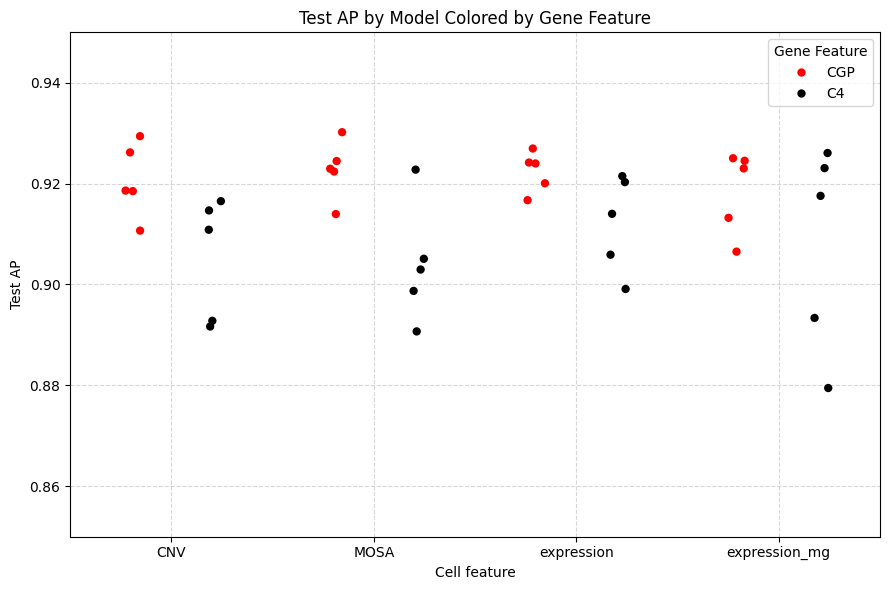

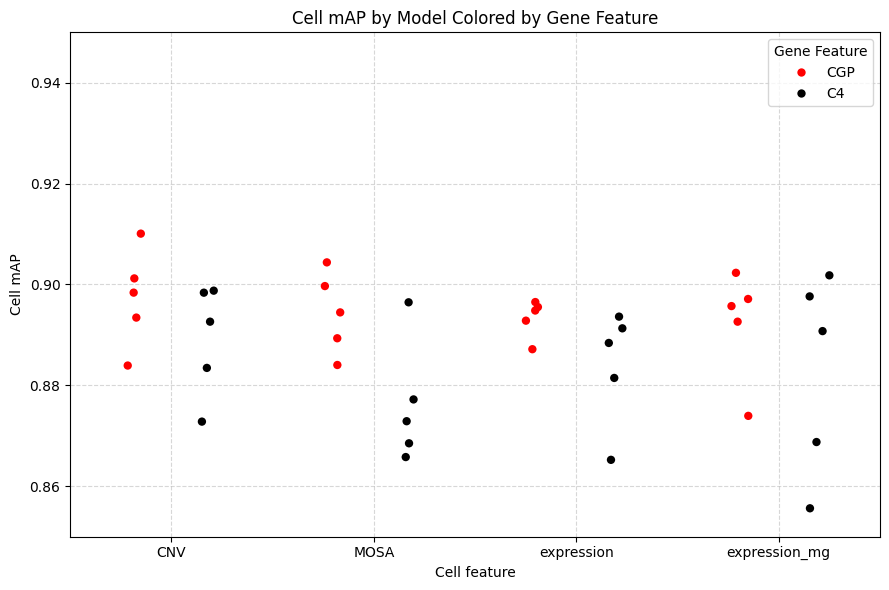

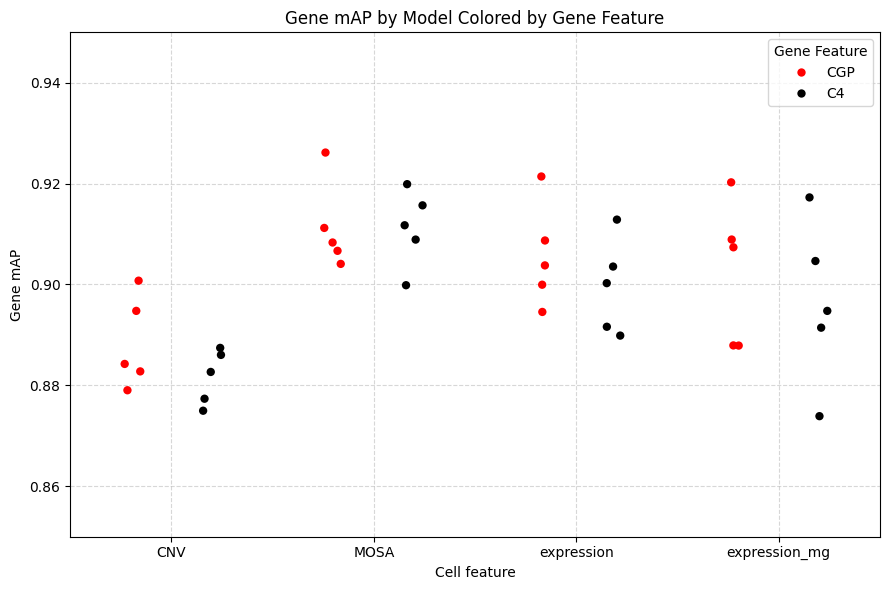

In [132]:
# Plot
plt.figure(figsize=(9, 6))
#sns.boxplot(data=df, x="Cell feature", y="Test AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test AP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()


# Plot
plt.figure(figsize=(9, 6))
#sns.boxplot(data=df, x="Cell feature", y="Cell mAP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Cell mAP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=6)

plt.title("Cell mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()


# Plot
plt.figure(figsize=(9, 6))
#sns.boxplot(data=df, x="Cell feature", y="Gene mAP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Gene mAP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=6)

plt.title("Gene mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

The gene_AP score is not influenced as much by the "gene_feature", but the other scores are. CGP generally gives better performance than C4.

Gene AP score also lower for CNV than for the other cell features

#### colored by model

ValueError: The palette dictionary is missing keys: {'GNN-GNN-MPDEP', 'GNN-GNN-MPMUT'}

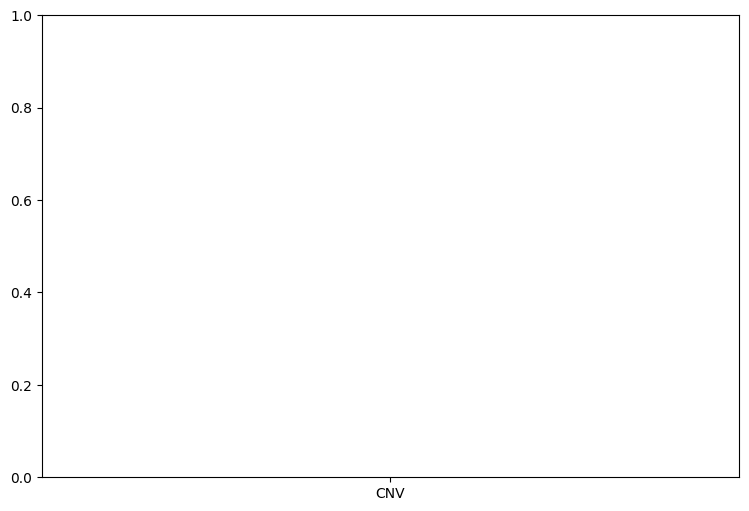

In [133]:
palette2 = {"GNN": "red", "GNN-GNN": "black", "MLP-GNN": "blue", "MLP": "green"}

# Plot 1: Test AP
plt.figure(figsize=(9, 6))
ax = sns.stripplot(data=df, x="Cell feature", y="Test AP", hue="Model", palette=palette2, dodge=True, jitter=True, size=6)

# Add gene feature annotations
for i, row in df.iterrows():
    # Get the position of the point
    x_pos = list(df["Cell feature"].unique()).index(row["Cell feature"])
    models = df["Model"].unique()
    model_pos = list(models).index(row["Model"])
    
    # Calculate x offset for dodging (similar to stripplot's dodge)
    n_models = len(models)
    dodge_width = 0.8 / n_models
    x_offset = (model_pos - (n_models - 1) / 2) * dodge_width
    
    # Add text annotation
    plt.text(x_pos + x_offset + 0.075, row["Test AP"], row["Gene feature"], 
             fontsize=8, ha='center', va='bottom', rotation=45)

plt.title("Test AP by Cell feature Colored by Model")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

# Plot 2: Cell mAP
plt.figure(figsize=(9, 6))
ax = sns.stripplot(data=df, x="Cell feature", y="Cell mAP", hue="Model", palette=palette2, dodge=True, jitter=True, size=6)

# Add gene feature annotations
for i, row in df.iterrows():
    # Get the position of the point
    x_pos = list(df["Cell feature"].unique()).index(row["Cell feature"])
    models = df["Model"].unique()
    model_pos = list(models).index(row["Model"])
    
    # Calculate x offset for dodging (similar to stripplot's dodge)
    n_models = len(models)
    dodge_width = 0.8 / n_models
    x_offset = (model_pos - (n_models - 1) / 2) * dodge_width
    
    # Add text annotation
    plt.text(x_pos + x_offset + 0.075, row["Cell mAP"], row["Gene feature"], 
             fontsize=8, ha='center', va='bottom', rotation=45)

plt.title("Cell mAP by Cell feature Colored by Model")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

# Plot 3: Gene mAP
plt.figure(figsize=(9, 6))
ax = sns.stripplot(data=df, x="Cell feature", y="Gene mAP", hue="Model", palette=palette2, dodge=True, jitter=True, size=6)

# Add gene feature annotations
for i, row in df.iterrows():
    # Get the position of the point
    x_pos = list(df["Cell feature"].unique()).index(row["Cell feature"])
    models = df["Model"].unique()
    model_pos = list(models).index(row["Model"])
    
    # Calculate x offset for dodging (similar to stripplot's dodge)
    n_models = len(models)
    dodge_width = 0.8 / n_models
    x_offset = (model_pos - (n_models - 1) / 2) * dodge_width
    
    # Add text annotation
    plt.text(x_pos + x_offset + 0.075, row["Gene mAP"], row["Gene feature"], 
             fontsize=8, ha='center', va='bottom', rotation=45)

plt.title("Gene mAP by Cell feature Colored by Model")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

# 3. Statisctical tests

## For model

In [134]:
from scipy.stats import f_oneway

# Example: Test AP by model
groups = [df[df["Model"] == model]["Test AP"] for model in df["Model"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA Test AP by Model: p =", p_val)


ANOVA Test AP by Model: p = 0.08135337969042046


Null hypothesis: all model's test AP are equal 
--> cannot be rejected because p = 0,14 > 0,05

In [135]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Model"], alpha=0.05)
print(tukey)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
          GNN GNN-GNN-MPDEP   0.0106 0.3766 -0.0061 0.0274  False
          GNN GNN-GNN-MPMUT   0.0166 0.0531 -0.0002 0.0334  False
          GNN           MLP   0.0075 0.6986 -0.0093 0.0243  False
          GNN       MLP-GNN   0.0124 0.2326 -0.0044 0.0292  False
GNN-GNN-MPDEP GNN-GNN-MPMUT    0.006  0.842 -0.0108 0.0228  False
GNN-GNN-MPDEP           MLP  -0.0031 0.9833 -0.0199 0.0137  False
GNN-GNN-MPDEP       MLP-GNN   0.0018 0.9981  -0.015 0.0185  False
GNN-GNN-MPMUT           MLP  -0.0091 0.5331 -0.0259 0.0077  False
GNN-GNN-MPMUT       MLP-GNN  -0.0042 0.9495  -0.021 0.0126  False
          MLP       MLP-GNN   0.0049 0.9181 -0.0119 0.0217  False
-----------------------------------------------------------------


Conclusion: all models score equally well

## For gene feature

In [136]:
tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Test AP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA Test AP by Gene Feature: p =", p_val)

df.groupby("Gene feature")["Test AP"].mean()


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    C4    CGP   0.0137 0.0002 0.0071 0.0204   True
--------------------------------------------------
ANOVA Test AP by Gene Feature: p = 0.00017174037424142152


Gene feature
C4     0.907353
CGP    0.921081
Name: Test AP, dtype: float64

Conclusion: p<0.05. This means that the CGP scores significantly better than the C4 ?

In [137]:
tukey = pairwise_tukeyhsd(endog=df["Gene mAP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Gene mAP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    C4    CGP   0.0047 0.2881 -0.0041 0.0135  False
---------------------------------------------------


In [138]:
tukey = pairwise_tukeyhsd(endog=df["Cell mAP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Cell mAP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    C4    CGP   0.0113 0.0031 0.0041 0.0185   True
--------------------------------------------------


In [139]:
df.groupby("Gene feature")["Cell mAP"].mean()


Gene feature
C4     0.883069
CGP    0.894371
Name: Cell mAP, dtype: float64

## For cell features

In [140]:
tukey = pairwise_tukeyhsd(endog=df["Gene mAP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Gene mAP"].mean()



     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA   0.0263    0.0  0.0137 0.0388   True
       CNV    expression   0.0177 0.0029  0.0051 0.0302   True
       CNV expression_mg   0.0144 0.0184  0.0019 0.0269   True
      MOSA    expression  -0.0086 0.2673 -0.0211 0.0039  False
      MOSA expression_mg  -0.0118 0.0698 -0.0243 0.0007  False
expression expression_mg  -0.0032 0.8987 -0.0157 0.0093  False
--------------------------------------------------------------


Cell feature
CNV              0.884993
MOSA             0.911251
expression       0.902655
expression_mg    0.899430
Name: Gene mAP, dtype: float64

In [141]:
tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Test AP"].mean()


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA   0.0004 0.9998  -0.015 0.0158  False
       CNV    expression   0.0043 0.8767 -0.0111 0.0197  False
       CNV expression_mg   0.0002    1.0 -0.0152 0.0156  False
      MOSA    expression   0.0038 0.9065 -0.0115 0.0192  False
      MOSA expression_mg  -0.0002    1.0 -0.0156 0.0152  False
expression expression_mg  -0.0041 0.8904 -0.0195 0.0113  False
--------------------------------------------------------------


Cell feature
CNV              0.912991
MOSA             0.913422
expression       0.917271
expression_mg    0.913182
Name: Test AP, dtype: float64

In [142]:
tukey = pairwise_tukeyhsd(endog=df["Cell mAP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Cell mAP"].mean()


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA   -0.008 0.4974 -0.0233 0.0072  False
       CNV    expression  -0.0046 0.8472 -0.0199 0.0107  False
       CNV expression_mg  -0.0057 0.7496 -0.0209 0.0096  False
      MOSA    expression   0.0034 0.9307 -0.0119 0.0187  False
      MOSA expression_mg   0.0024 0.9755 -0.0129 0.0176  False
expression expression_mg  -0.0011 0.9976 -0.0163 0.0142  False
--------------------------------------------------------------


Cell feature
CNV              0.893302
MOSA             0.885269
expression       0.888684
expression_mg    0.887625
Name: Cell mAP, dtype: float64

# analyze full gird search results